# Importing libraries 

In [63]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split#splitting data arr into two subsets
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import warnings
warnings.simplefilter(action="ignore")

In [64]:
df= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [65]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [66]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [67]:
df.shape

(5110, 12)

There are total of 5110 columns and 12 rows

In [68]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [69]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [70]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [71]:
df[df==0].count()

id                      0
gender                  0
age                     0
hypertension         4612
heart_disease        4834
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status          0
stroke               4861
dtype: int64

<Axes: ylabel='count'>

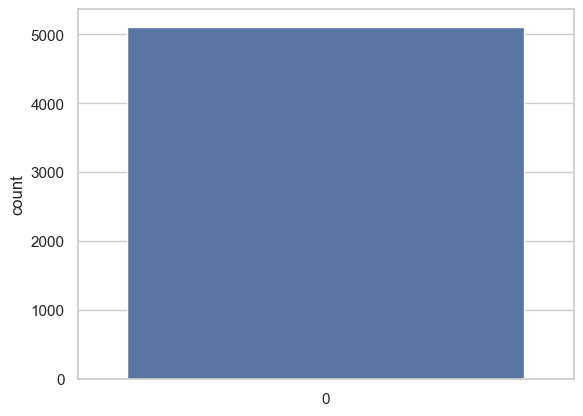

In [72]:
sns.countplot(df['stroke'])

In [73]:
#filling null values with mean
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [74]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<Axes: xlabel='avg_glucose_level', ylabel='Density'>

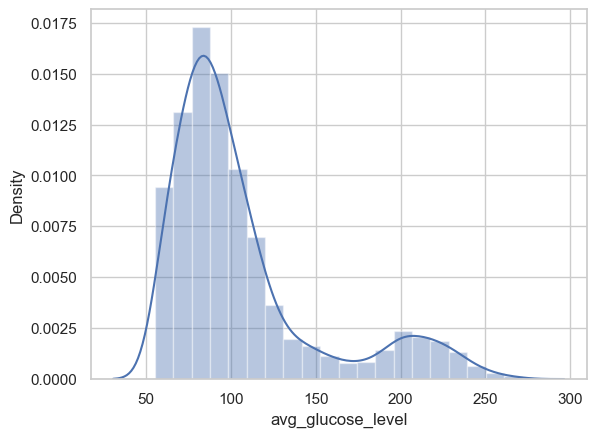

In [76]:
sns.distplot(df['avg_glucose_level'], bins=20)

<Axes: xlabel='age', ylabel='Density'>

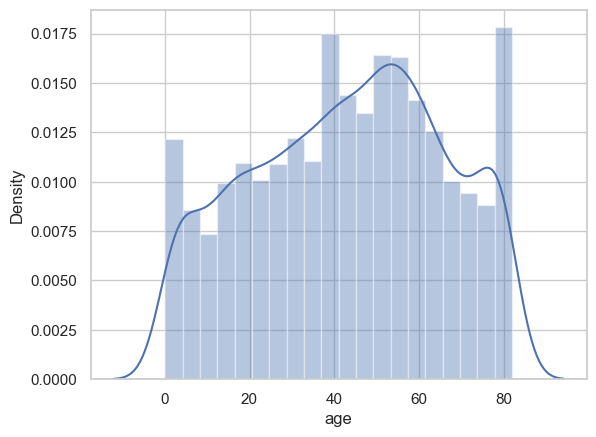

In [77]:
sns.distplot(df['age'], bins=20)

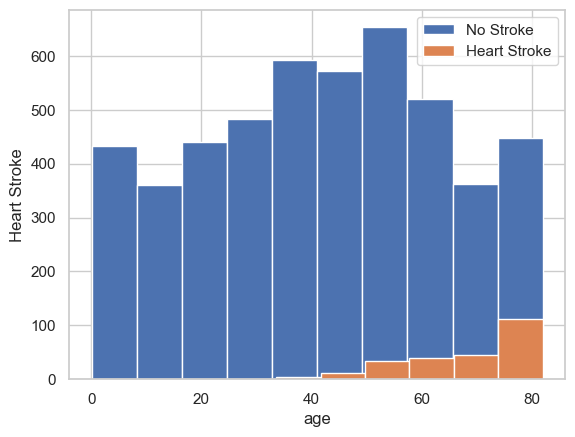

In [78]:
#does age has impact on strokes  SO ans->yes
#chances of stroke increases with increases in age
df.loc[df['stroke'] == 0,'age'].hist(label='No Stroke')
df.loc[df['stroke'] == 1,'age'].hist(label='Heart Stroke')
plt.xlabel('age')
plt.ylabel('Heart Stroke')
plt.legend()

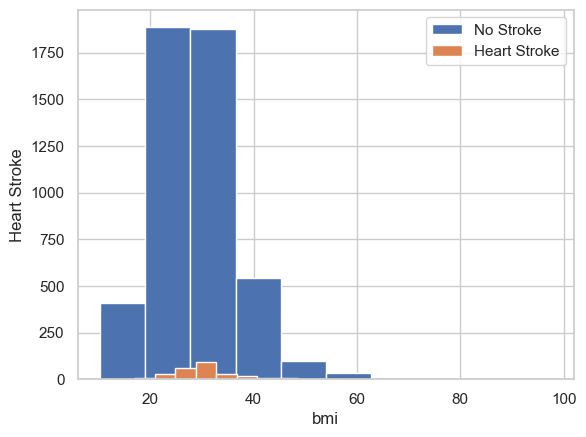

In [79]:
#chances of stroke more with bmi 20-40
df.loc[df['stroke'] == 0,'bmi'].hist(label='No Stroke')
df.loc[df['stroke'] == 1,'bmi'].hist(label='Heart Stroke')
plt.xlabel('bmi')
plt.ylabel('Heart Stroke')
plt.legend()


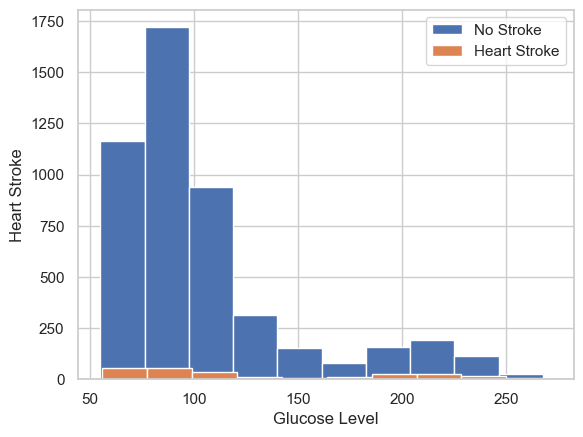

In [80]:
#chances of stroke high with glucose levels in range of 70-100
df.loc[df['stroke'] == 0,'avg_glucose_level'].hist(label='No Stroke')
df.loc[df['stroke'] == 1,'avg_glucose_level'].hist(label='Heart Stroke')
plt.xlabel('Glucose Level')
plt.ylabel('Heart Stroke')
plt.legend()

In [81]:
#females with heart disease has more chances of stroke
pd.pivot_table(df, index= 'stroke', columns='gender', values='heart_disease', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,2853.0,2007.0,1.0
1,141.0,108.0,NaN


In [82]:
#people having private jobs and has a habit of smoking has more chance of heart stroke 
pd.pivot_table(df, index= 'stroke', columns='work_type', values='smoking_status', aggfunc= 'count')

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,624.0,22.0,2776.0,754.0,685.0
1,33.0,NaN,149.0,65.0,2.0


In [83]:
#females with hypertension has more chance of heart stroke than males having hypertension problem
pd.pivot_table(df, index= 'stroke', columns='gender', values='hypertension', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,2853.0,2007.0,1.0
1,141.0,108.0,NaN


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

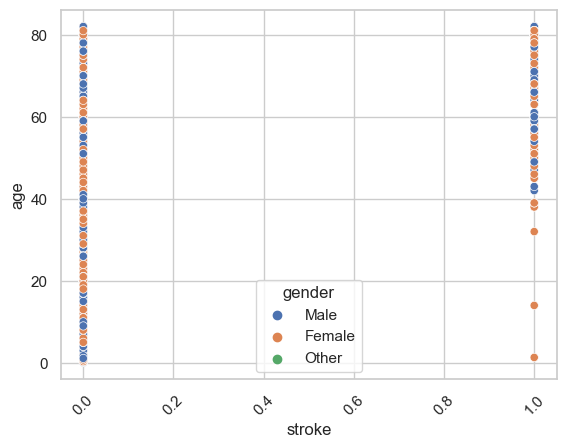

In [84]:
#as age increases gender does not play any role in heart stroke
sns.scatterplot(x= 'stroke', y='age', hue='gender', sizes= (15,200), data=df)
plt.xticks(rotation=45)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300')])

<Figure size 2800x2000 with 0 Axes>

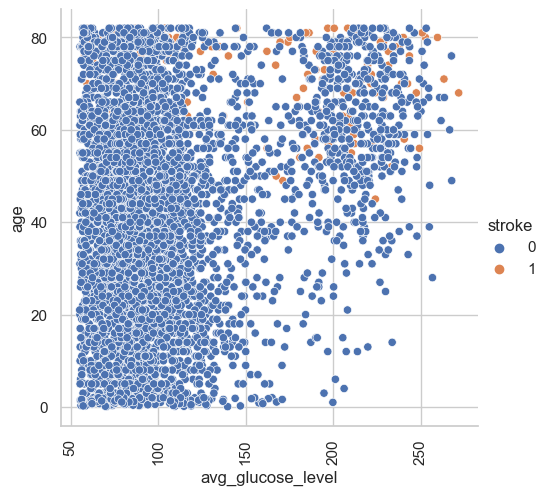

In [85]:
#with age glucose level increases which increases the chances of stroke
plt.figure(figsize=(28,20))
sns.relplot(x= 'avg_glucose_level', y='age', hue= 'stroke', sizes= (15,200), data=df)
plt.xticks(rotation=90)

In [86]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [87]:
#ENCODING THE DATASETS
from sklearn import preprocessing 
encoder = preprocessing.LabelEncoder()
for i in df.columns:
        if isinstance(df[i][0], str):
            df[i] = encoder.fit_transform(df[i])


In [88]:
#STANDARDIZING
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler() 
scalar.fit(df) 
scaled_data = scalar.transform(df)

In [89]:

#creating a model
X= df.drop('stroke', axis=1)
X.shape

(5110, 11)

In [90]:

y= df['stroke']
y.shape

(5110,)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state = 100)

In [92]:
log = LogisticRegression()

In [93]:
log.fit(X_train,y_train)

LogisticRegression()

In [94]:
log.score(X_train, y_train)

0.9488398098965614

In [95]:
#to retain the original data, we craeted a copy of the dataset
df_copy= df.copy()

In [96]:
df_copy.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [97]:

#creating a list of data values which is more in number to make a balance data
li = list(df_copy[df_copy.stroke == 0].sample(n=2000).index)
df_copy['stroke'].value_counts() 


0    4861
1     249
Name: stroke, dtype: int64

In [98]:
df = pd.DataFrame(df)
df.reset_index()

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [99]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values
X.shape

(5110, 11)

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=10)

NameError: name 'train_test_split' is not defined

In [ ]:
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#the accuracy has dropped
log.score(X_test, y_test)

0.9497716894977168

In [103]:
#predicting the output with Logistic
y_underlog = log.predict(X)

In [104]:
print('The accuracy score of the model is:', accuracy_score(y,y_underlog)*100)
print('The F1 score of the model is:', f1_score(y, y_underlog)*100)
print('The recall score of the model is:', recall_score(y, y_underlog)*100)
print('The confusion matrix of the model is:', confusion_matrix(y, y_underlog))
print('The classification report of logistic model is:', classification_report(y, y_underlog))

The accuracy score of the model is: 95.06849315068493
The F1 score of the model is: 0.7874015748031495
The recall score of the model is: 0.4016064257028112
The confusion matrix of the model is: [[4857    4]
 [ 248    1]]
The classification report of logistic model is:               precision    recall  f1-score   support

           0       0.95      1.00      0.97      4861
           1       0.20      0.00      0.01       249

    accuracy                           0.95      5110
   macro avg       0.58      0.50      0.49      5110
weighted avg       0.91      0.95      0.93      5110



In [105]:
cm_log= confusion_matrix(y, y_underlog)

<Axes: title={'center': 'Logistic Regression Confusion Matrix'}>

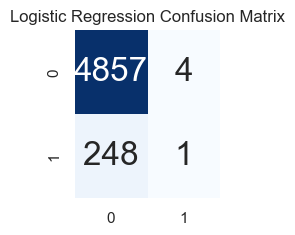

In [106]:
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_log,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [107]:
import pickle
pickle.dump(log, open("strokenew.pkl", "wb"))

In [108]:

for i in y_underlog:
    print (i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [109]:
log.score(X_test, y_test)

0.9497716894977168